Hill Climbing
=======

# Theory

## Definition


## Examples


# Implementation


## Imports

In [10]:
import math
import matplotlib
import numpy as np
import pandas as pd
from typing import Callable
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
matplotlib.rcParams['animation.embed_limit'] = 2**128

## Parameters

In [11]:
# No general Parameters

## Algorithm


In [12]:
def HC(cost_func: Callable, get_neighborhood: Callable, x_0: float, maxiter: int = int(5e3), task: str = "minimization") -> tuple[float, list, int]:


    # algorithm data
    x = [x_0]
    cost = [cost_func(x_0)]

    for _ in range(maxiter-1):
        
        # select the best neighbor
        neighbors = get_neighborhood(x[-1])
        neighbors_costs = np.array([cost_func(neighbor) for neighbor in neighbors])
        best_neighbor = neighbors[ neighbors_costs.argsort()[0] ]

        # accept if neighbor is better
        if cost_func(best_neighbor) < cost_func(x[-1]):
            x.append(best_neighbor)
            cost.append(cost_func(best_neighbor))

        # terminate if neighbor is worse
        if cost_func(best_neighbor) > cost_func(x[-1]):
            break
        
    
    x_optimal, moves, history= x[-1], len(x), pd.DataFrame({"cost": cost, "x": x})

    return x_optimal, moves, history

## Results Visualization

### Optima of Mathematical Function

In [13]:
# cost function and neighborhood definition
def cost_func(x: float) -> float:
    '''
    The cost is calculated use a mathematical expression "i.e. the mathematical function to be optimized"
    '''
    return 30*np.sin(x) + x**2

def get_neighborhood(x: float) -> np.array:
    '''
    The neighborhood around x is defined as the list of numbers that is close to x within a given range "i.e.
    an interval around x => [x-5, x+5]". Note that x is excluded from this list.
    '''
    interval_around_x = np.linspace(x-0.1, x+0.1) 
    return interval_around_x[ interval_around_x != x ]

# starting value search
x_0 = 8

In [14]:
x_optimal, moves, history = HC(cost_func=cost_func,
                               get_neighborhood=get_neighborhood,
                               x_0=x_0
                               )

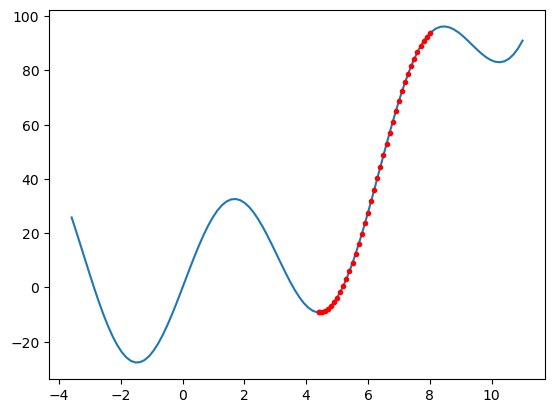

In [15]:
xx = np.linspace(history["x"].min()-8, history["x"].max()+3, num=100)

plt.plot(xx, cost_func(xx))
plt.plot(history["x"], history["cost"], 'r.')

### N-Queens Problem

In [38]:
def cost_function(queens: np.array) -> float:
    '''
    The cost is calculated by counting the total number of attacks on the board. The attacks considered in this cost function are vertical, 
    horizontal and diagonal attacks. It should be noted that comitative attacks are counted once "For example, a vertical attack from Queen_i 
    on Queen_j is that same as the vertical attack from Queen_j on Queen_i, hence they are counted as 1 attack together"
    '''
    # collect queens position index, index in vertical and right/left diagonal lines
    vertical_positions = queens
    right_diagonal_positions = -1*( 1*queens - np.arange(len(queens))*-1 )
    left_diagonal_positions  = -1*( -1*queens - np.arange(len(queens))*-1 )
    
    # check for attacks, by checking if they share same position index
    cost = 0
    for queen_positions in [vertical_positions, right_diagonal_positions, left_diagonal_positions]:
        _, counts = np.unique(queen_positions, return_counts=True)
        if any(counts > 1):
           cost += sum([math.comb(queens_same_axis, 2) for queens_same_axis in counts[counts > 1]])
    
    return cost

def get_neighborhood(queens: np.array) -> np.array:
    '''
    The neighborhood around a given board configuration "i.e. queens" is defined as the list of boards that is close to the current configuration. Close 
    is defined by the following, any board where one queen is shifted either two steps, or less; to the right or to the left in the board while keep other
    queens positions the same
    '''
    N = len(queens)
    neighborhood = []
    for i in range(N):
        
        for shift in [1,2]:
            # shift a queen to right and left
            shift = shift*np.eye(1,N, k=i).reshape((N))
            neighbor1 = queens + shift
            neighbor2 = queens - shift

            # test validity of neighbors
            if np.all(neighbor1 <= N-1):
                neighborhood.append(neighbor1)

            if np.all(neighbor2 >= 0):
                neighborhood.append(neighbor2)
      
    return np.array(neighborhood)

def print_board(ax, queens: np.array) -> None:
    '''
    Function that take the board configuration "i.e. queens" and print it using matplotlib
    '''
    N = len(queens)
    board = np.zeros((N,N,3))
    board += 0.5 # "Black" color. Can also be a sequence of r,g,b with values 0-1.
    board[::2, ::2] = 1 # "White" color
    board[1::2, 1::2] = 1 # "White" color

    fig, ax = plt.subplots()
    board = np.array([[[0.5,0.5,0.5] if (pixel_i+pixel_j)%2 
                       else [1,1,1] for pixel_i in range(N)] for pixel_j in range(N)])
    ax.imshow(board, interpolation='nearest')

    for y, x in enumerate(queens):
        # Use "family='font name'" to change the font
        ax.text(x, y, u'\u2655', size=30, ha='center', va='center')

    [ax.text(x, y, u'\u2655', size=30, ha='center', va='center') for y, x in enumerate(queens)]
    ax.set(xticks=[], yticks=[])
    ax.axis('image')

# search starting value
queens_0 = np.random.choice(range(4), size=4)

In [32]:
x_optimal, moves, history = HC(cost_func=cost_function,
                               get_neighborhood=get_neighborhood,
                               x_0=queens_0
                               )

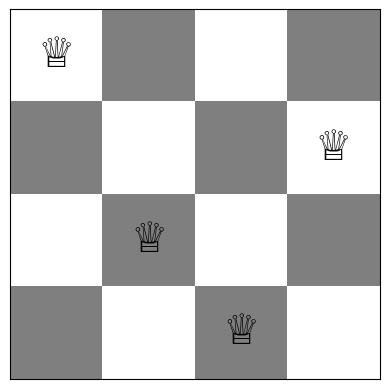

In [39]:
print_board(0, x_optimal)